In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression, chi2
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.pipeline import Pipeline, FeatureUnion, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from src.features.v3.improve_pipeline import imputation_pipeline

In [2]:
house_data = pd.read_csv('../../data/external/train.csv')
house_data.drop('Id', axis=1, inplace=True)

In [3]:
y = house_data.pop('SalePrice')

In [4]:
house_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [6]:
full_impute_pipeline = imputation_pipeline()

In [7]:
full_impute_pipeline.fit_transform(house_data)

array([['None', 'BrkFace', 'Gd', ..., 196.0, 'BrkFace', 2003.0],
       ['None', 'None', 'Gd', ..., 0.0, 'None', 1976.0],
       ['None', 'BrkFace', 'Gd', ..., 162.0, 'BrkFace', 2001.0],
       ...,
       ['None', 'None', 'TA', ..., 0.0, 'None', 1941.0],
       ['None', 'None', 'TA', ..., 0.0, 'None', 1950.0],
       ['None', 'None', 'TA', ..., 0.0, 'None', 1965.0]], dtype=object)

In [33]:
binary_columns = ['PavedDrive', 'CentralAir', 'Street']

nominal_columns = ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                   'LotConfig', 'Neighborhood', 'Condition1',
                   'Condition2', 'BldgType', 'HouseStyle', 'Street',
                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                   'MasVnrType', 'Foundation', 'Heating', 'Electrical',
                   'Functional', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish',
                   'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

ordinal_columns = ['MSSubClass', 'LandSlope', 'OverallQual',
                   'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
                   'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
                   'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',
                   'PavedDrive', 'CentralAir']

continues_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
                     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                     '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                     'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                     'ScreenPorch', 'PoolArea', 'MiscVal']

discrete_columns = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']

missing_cat_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       'FireplaceQu', 'GarageType', 'GarageFinish',
                       'GarageQual', 'GarageCond', 'PoolQC',
                       'Fence', 'MiscFeature']

missing_num_columns = ['LotFrontage', 'GarageYrBlt']

imputing_cols = [*missing_cat_columns,
                 'Electrical', 'LotFrontage',
                 'MSZoning', 'MasVnrArea',
                 'MasVnrType', 'GarageYrBlt']

In [9]:
house_data[imputing_cols] = full_impute_pipeline.fit_transform(house_data)

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

#### correcting wrong data types in data

In [13]:
house_data.select_dtypes(include=object)

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2003.0,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,1976.0,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2001.0,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,1998.0,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,2000.0,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,1999.0,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,85.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,1978.0,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,66.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,1941.0,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,68.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,1950.0,Unf,TA,TA,Y,None,None,None,WD,Normal


In [11]:
house_data[['LotFrontage', 'MasVnrArea']] = house_data[['LotFrontage', 'MasVnrArea']].astype(np.float32)

#### Feature encoding

there are two types of qualitative data are presenting in this dataset nominal and ordinal.

In [12]:
nominal_encoding = OneHotEncoder()

In [13]:
nominal_encoding.fit_transform(house_data[nominal_columns])

<1460x203 sparse matrix of type '<class 'numpy.float64'>'
	with 42340 stored elements in Compressed Sparse Row format>

In [14]:
encoded_nominals = pd.DataFrame.sparse.from_spmatrix(nominal_encoding.fit_transform(house_data[nominal_columns]),
                                                     columns=nominal_encoding.get_feature_names_out().tolist())

In [15]:
np.sort(mutual_info_regression(encoded_nominals, y, n_neighbors=5))[::-1]

array([1.79850456e-01, 1.30124753e-01, 1.23461726e-01, 1.11541360e-01,
       1.08313321e-01, 1.05105001e-01, 9.79602833e-02, 8.36571785e-02,
       8.27645949e-02, 7.78911299e-02, 7.62015815e-02, 7.28800215e-02,
       7.05988883e-02, 6.99490037e-02, 6.66812893e-02, 6.63566951e-02,
       6.57416547e-02, 6.02373016e-02, 5.60329079e-02, 5.60329079e-02,
       5.03495406e-02, 5.00457540e-02, 4.98857194e-02, 4.78526375e-02,
       4.39917414e-02, 4.31957299e-02, 4.25054953e-02, 4.17054926e-02,
       3.99456052e-02, 3.30038387e-02, 3.26099055e-02, 3.23471262e-02,
       3.08899441e-02, 3.05196694e-02, 2.92443505e-02, 2.86218952e-02,
       2.85654174e-02, 2.79442638e-02, 2.78745297e-02, 2.76322200e-02,
       2.73352747e-02, 2.73058835e-02, 2.68143568e-02, 2.59454822e-02,
       2.58601428e-02, 2.55911366e-02, 2.31328001e-02, 2.25837188e-02,
       2.23818961e-02, 2.15199675e-02, 2.05752360e-02, 2.00618301e-02,
       1.93407161e-02, 1.90911015e-02, 1.90181237e-02, 1.84457388e-02,
      

In [16]:
SelectKBest(mutual_info_regression, k=25).fit_transform(encoded_nominals, y)

<1460x25 sparse matrix of type '<class 'numpy.float64'>'
	with 11302 stored elements in Compressed Sparse Row format>

In [17]:
chi2(nominal_encoding.fit_transform(house_data[nominal_columns]), y)[1]

array([5.56441796e-20, 1.15690513e-07, 9.99999898e-01, 1.00000000e+00,
       9.75524681e-01, 9.99974294e-01, 1.00000000e+00, 3.85525651e-01,
       9.99995475e-01, 6.10019064e-01, 1.75823712e-15, 1.00000000e+00,
       6.66200385e-01, 1.41743908e-03, 9.89841282e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99854750e-01, 1.21604923e-01,
       5.09032615e-01, 2.43843518e-01, 1.00000000e+00, 6.69375495e-09,
       1.00000000e+00, 8.48145830e-01, 9.35515257e-01, 9.99999992e-01,
       8.58502763e-02, 3.21504097e-03, 9.99505991e-01, 5.02589602e-01,
       2.35682437e-02, 2.44977414e-01, 9.99989453e-01, 9.99261752e-01,
       9.99996259e-01, 9.99999922e-01, 3.82176450e-20, 1.77972031e-23,
       9.90962197e-01, 1.00000000e+00, 1.00000000e+00, 6.44274009e-01,
       4.53600101e-08, 6.03694200e-08, 1.10255141e-05, 2.80295188e-16,
       6.78990782e-01, 9.99770550e-01, 1.00000000e+00, 1.00000000e+00,
       5.80087403e-02, 1.00000000e+00, 1.18972833e-01, 9.99999961e-01,
      

In [18]:
SelectKBest(chi2, k=25).fit_transform(
    nominal_encoding.fit_transform(house_data[nominal_columns]), y)

<1460x25 sparse matrix of type '<class 'numpy.float64'>'
	with 684 stored elements in Compressed Sparse Row format>

In [23]:
SelectFromModel(RandomForestRegressor(min_samples_split=20,
                                      min_samples_leaf=10,
                                      n_jobs=-1)).fit_transform(
    nominal_encoding.fit_transform(house_data[nominal_columns]), y)

<1460x24 sparse matrix of type '<class 'numpy.float64'>'
	with 12064 stored elements in Compressed Sparse Row format>

In [20]:
house_data[binary_columns].nunique()

PavedDrive    3
CentralAir    2
Street        2
dtype: int64

In [21]:
house_data['PavedDrive'].value_counts(), house_data['CentralAir'].value_counts(), house_data['Street'].value_counts()

(Y    1340
 N      90
 P      30
 Name: PavedDrive, dtype: int64,
 Y    1365
 N      95
 Name: CentralAir, dtype: int64,
 Pave    1454
 Grvl       6
 Name: Street, dtype: int64)

In [22]:
order_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': -1,
             'NO': -1, 'No': -1, 'Av': 3, 'Mn': 2, 'Reg': 0, 'IR1': 1,
             'IR2': 2, 'IR3': 3, 'Gtl': 1, 'Mod': 2, 'Sev': 3, 'Y': 1,
             'N': 0, 'P': -1}
house_data[ordinal_columns].replace(order_map)

,MSSubClass,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,PavedDrive,CentralAir
0,60,1,7,5,4,3,4,3,-1,5,4,-1,3,3,-1,1,1
1,20,1,6,8,3,3,4,3,4,5,3,3,3,3,-1,1,1
2,60,1,7,5,4,3,4,3,2,5,4,3,3,3,-1,1,1
3,70,1,7,5,3,3,3,4,-1,4,4,4,3,3,-1,1,1
4,60,1,8,5,4,3,4,3,3,5,4,3,3,3,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1,6,5,3,3,4,3,-1,5,3,3,3,3,-1,1,1
1456,20,1,6,6,3,3,4,3,-1,3,3,3,3,3,-1,1,1
1457,70,1,7,9,5,4,3,4,-1,5,4,4,3,3,-1,1,1
1458,20,1,5,6,3,3,3,3,2,4,4,-1,3,3,-1,1,1


### improvement pipeline

In [50]:
nominal_encode_pipeline = Pipeline([('select_nominal', FunctionTransformer(lambda df: df[nominal_columns])),
                                    ('one_hot', OneHotEncoder()),
                                    ('feature_selection', SelectFromModel(RandomForestRegressor(min_samples_split=20,
                                                                                                min_samples_leaf=10,
                                                                                                n_jobs=-1))),
                                    ('to_df',
                                     FunctionTransformer(lambda metrix: pd.DataFrame.sparse.from_spmatrix(metrix)))])

ordinal_encode_pipeline = Pipeline([('select_ordinal', FunctionTransformer(lambda df: df[ordinal_columns])),
                                    ('encode', FunctionTransformer(lambda df: df.replace(order_map)))])

continues_pipeline = Pipeline([('select_cont', FunctionTransformer(lambda df: df[continues_columns])),
                               ('transformation', FunctionTransformer(lambda df: df.apply(np.log1p)))])

discrete_pipeline = Pipeline([('select_discrete', FunctionTransformer(lambda df: df[discrete_columns]))])

In [54]:
discrete_pipeline.fit_transform(house_data, y)

,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
0,2003,2003,1,0,2,1,3,1,8,0,2003.0,2,2,2008
1,1976,1976,0,1,2,0,3,1,6,1,1976.0,2,5,2007
2,2001,2002,1,0,2,1,3,1,6,1,2001.0,2,9,2008
3,1915,1970,1,0,1,0,3,1,7,1,1998.0,3,2,2006
4,2000,2000,1,0,2,1,4,1,9,1,2000.0,3,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1999,2000,0,0,2,1,3,1,7,1,1999.0,2,8,2007
1456,1978,1988,1,0,2,0,3,1,7,2,1978.0,2,2,2010
1457,1941,2006,0,0,2,0,4,1,9,2,1941.0,1,5,2010
1458,1950,1996,1,0,1,0,2,1,5,0,1950.0,1,4,2010


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>],
       [<AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'MiscVal

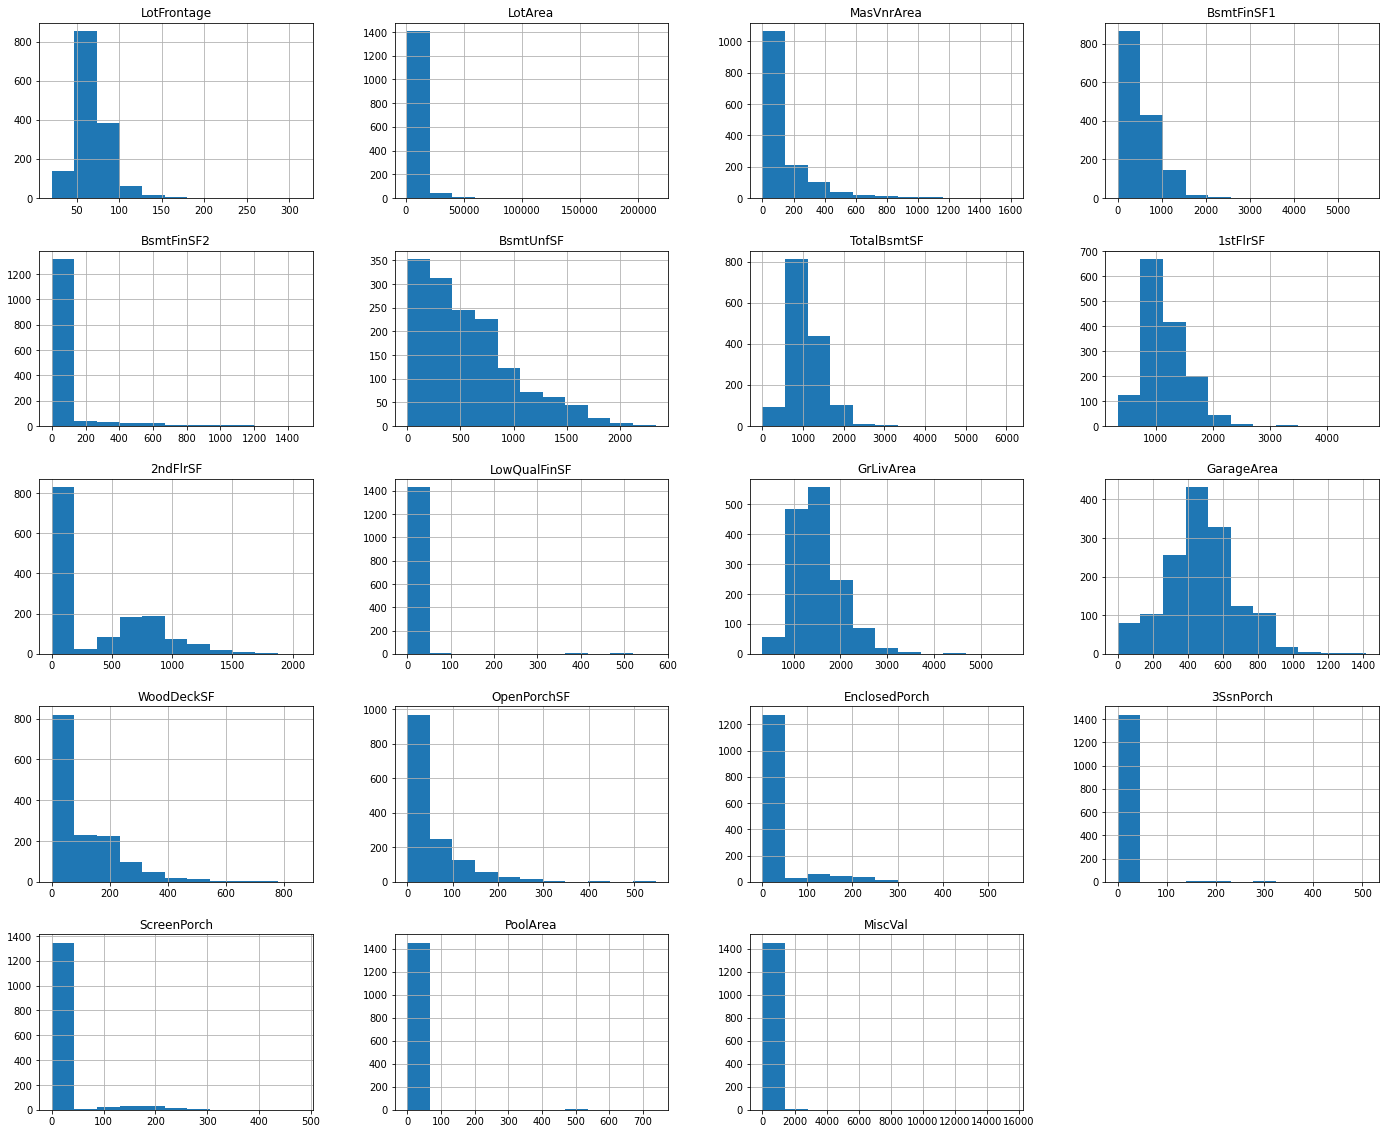

In [47]:
house_data[continues_columns].hist(figsize=[24, 20],
                                   bins=11)

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>],
       [<AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>,
        <AxesSubplot:title={'center':'MiscVal

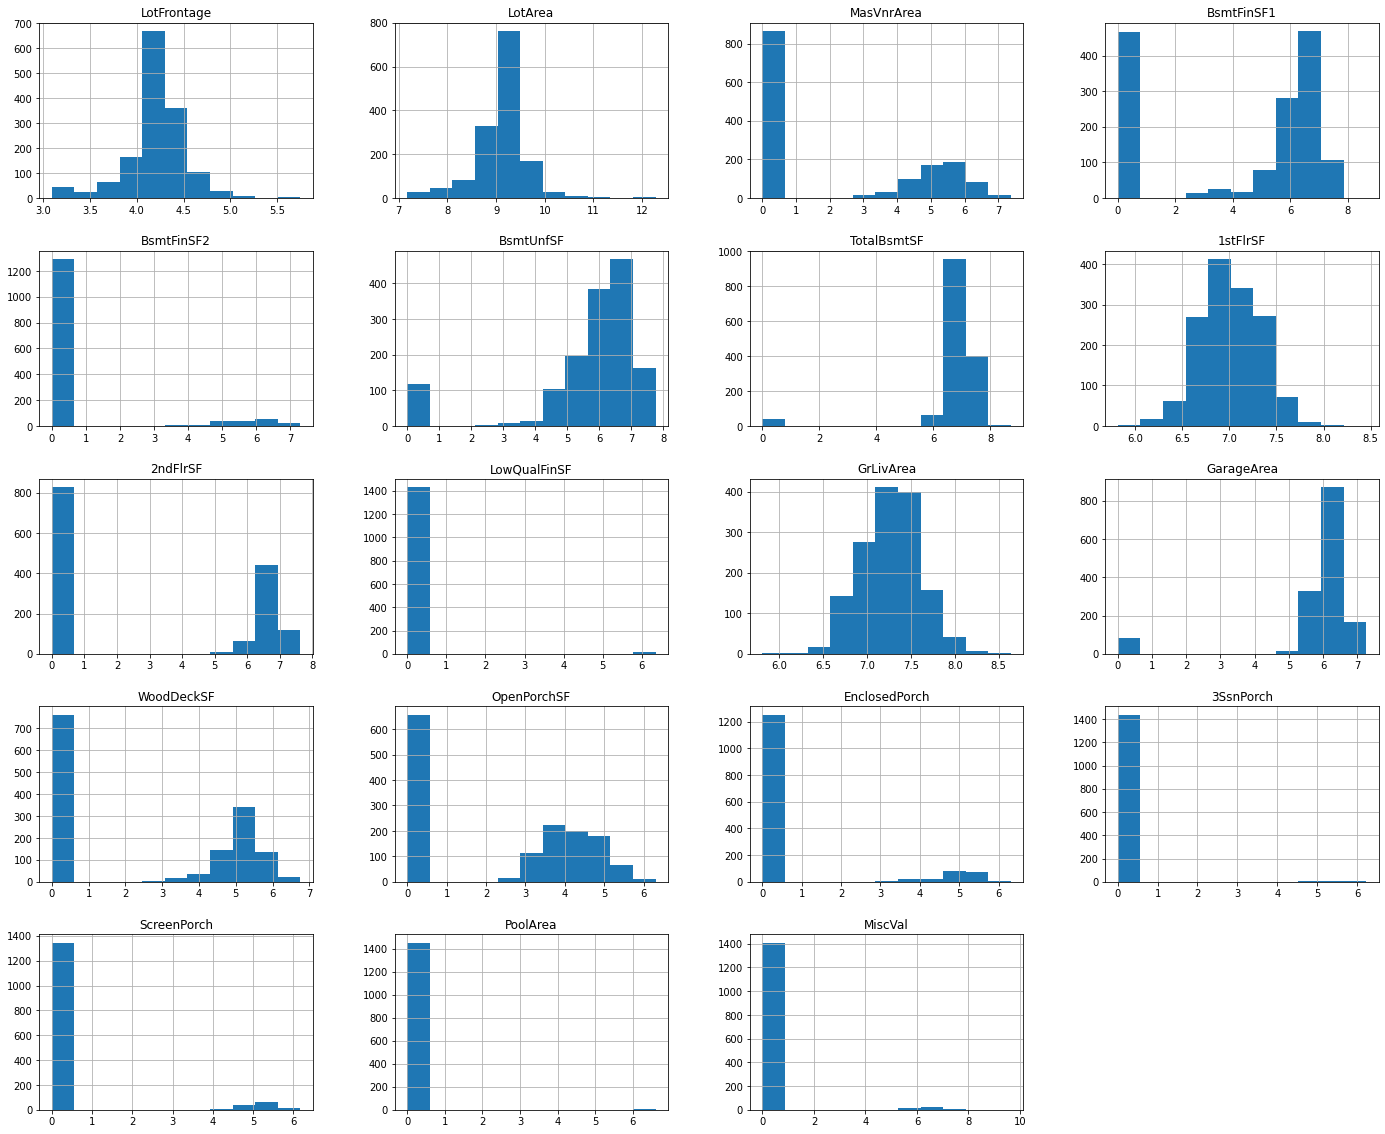

In [48]:
house_data[continues_columns].apply(np.log1p).hist(figsize=[24, 20],
                                                   bins=11)